In [56]:
import pandas as pd
import json
import os
import nltk
import re
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\h.ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [57]:
print(os.path.exists('C:/data/task_02_data.csv')) 

True


In [58]:
dataset = dataset = pd.read_csv('C:/data/task_02_data.csv')
dataset

,lematized_sent,Catagories
0,aj ek shia se mila mene us pocha k tum log zul...,religious offensive
1,qadyani ka jo yaar hai ghaddar,religious offensive
2,aby jaa khatmal tum sare mutah ki paidawar ho,religious offensive
3,mirza qadyani aur is ki zaryat ke kafir honay ...,religious offensive
4,sare shia jahil hain in ky belief ki tarha,religious offensive
...,...,...
595,bhai ye kia sun raha hun is ka matlb me bilkul...,Neutral
596,bhai dunya gol ha kisi na tariqe se ye bat sam...,Neutral
597,g m asaa kuch nahi khti,Neutral
598,g apne friday ko e ye alfaz milahaza fermae thy,Neutral


In [59]:
sent = dataset
sent = sent[sent['Catagories'] != 'Neutral']
sent = sent[['lematized_sent','Catagories']]
list_sent = sent.values.tolist()
print(list_sent)

[['aj ek shia se mila mene us pocha k tum log zuljana ki tatti bhi khate ho kia bhsori wala', 'religious offensive'], ['qadyani ka jo yaar hai ghaddar', 'religious offensive'], ['aby jaa khatmal tum sare mutah ki paidawar ho', 'religious offensive'], ['mirza qadyani aur is ki zaryat ke kafir honay mein bhi koi shak nahi jo un kufr kere woh musalman', 'religious offensive'], ['sare shia jahil hain in ky belief ki tarha', 'religious offensive'], ['mazak se hat k sunni bohat chotiya hain', 'religious offensive'], ['shia tum log zuljana ki tatti ho gandu', 'religious offensive'], ['log suno agar corona virus khatam bhi ho jaye tab shia se dor raho yeh gandagi ka dhair hain bharwa', 'religious offensive'], ['tm firoun ki aulad ho bharwa khatmal', 'religious offensive'], ['isko zakir kutta ko to bethaya gaya hai sahabi k khilaf bhonkny lye', 'religious offensive'], ['shia kanjar ghoray ke pujari yeh ganday ghaleez aqeedah ka giroh hai karorron lanat un par', 'religious offensive'], ['bhar me

In [107]:
target_group = {

        "shia": "shia",
        "zuljana": "shia",
        "qadyani": "qadyani",
        "sunni": "sunni",
        "khatmal": "shia",
        "mirza": "qadyani",
        "hindu": "hindu",
        "deobandi": "deobandi",
        "barelvi": "barelvi",
        "ahmadi": "qadyani",
        "tableeghi jamaat": "deobandi",
        "mirzai": "qadyani",
        "musalman": "muslim",
        "zamin": "shia",
        "bhagwan": "hindu",
        "mutah": "shia",
        "muslim": "muslim",
        "tabarra": "shia",
        "shiva": "hindu",
        "matam": "shia",
        "madarssa": "muslim",
        "sham e ghareeban": "shia",
        "niazi": "PTI",
        "zulfi bukhari": "PTI",
        "mariyam": "PMLN",
        "pmln": "PMLN",
        "pti": "PTI",
        "noon league": "PMLN",
        "benazir": "PPP",
        "billorani": "PPP",
        "peoples party": "PPP",
        "fawad": "PTI",
        "youthiya": "PTI",
        "jiyala": "PPP",
        "bilawal": "PPP",
        "zardari": "PPP",
        "mariyam nawaz": "PMLN",
        "nawaz shreef": "PMLN",
        "shehbaz shareef": "PMLN",
        "hamza": "PMLN",
        "bhutto": "PPP",
        "imran khan": "PTI",
        "pppp": "PPP",
        "patwari": "PMLN",
        "shahbaz shareef": "PMLN",
        "mariyam aurangzeb": "PMLN",
        "miyan sahab": "PMLN",
        "nawaz": "PMLN",
        "mian sahib": "PMLN",
        "rana sanaullah": "PMLN",
        "nawaz sharif": "PMLN",
        "imrando": "PTI"
    }

In [108]:
offensive_words =[
    "tatti", 
	"bhsori walon", 
	"ghaddar", 
	"kafir", 
	"jahil",
    "chotiya",
	"bharwa",
	"firoun ki aulad",
	"kutta",
	"kanjar",
	"ghaleez",
	"lanat",
	"bhenchod",
	"gand marao",
	"maloon",
	"pagal",
	"harami",
	"khinzir",
	"gandu",
	"chod",
    "bhsori wala",
	"gustaakh",
	"lanti",
	"napak",
	"gand marwa",
	"gand",
	"zaleel",
	"bhonkna",
	"murtad",
	"fitna",
	"chinal ki aulad",
	"palidh",
	"kufr",
	"kameena",
	"bhen ki lora",
	"bhsori wale",
	"mutah ki is paidawar",
    "mutah ki paidawar",
    "khatmal ",
	"lund prh charh",
	"khabees",
	"fitna",
	"lund pe charh",
	"dajjal ki aulad",
	"randi",
	"bsdk",
	"dalal",
	"tatty",
	"besharam",
	"bund marwa",
	"haram khor",
	"beghairat",
	"gadhay",
	"chor",
	"bhagora",
	"bhikari",
	"nasoor",
	"hijra",
	"lora",
	"chodny",
	"dalla",
	"haramkhor",
	"madarchod",
	"lund",
	"lakh di lanat",
	"kutta k bacha",
	"manhoos",
	"bhosri ke",
	"bilawal rani",
	"jhota",
	"khusra",
	"naalaiq",
	"loot maar",
	"kutta da putar",
	"dain",
	"youthiya",
	"daku",
	"patwari",
	"imrando"
  ]

In [109]:


dataset = list_sent

target_group = {key.lower(): value.lower() for key, value in target_group.items()}

offensive_words.sort(key=len, reverse=True)
print(offensive_words)
####################################################################################
extracted_group = []

for sent in dataset:
    # Correctly access the sentence text and its category
    sent_text = sent[0].lower()  # Access the first element if 'sent' is a list
    sent_category = sent[1]  # Access the second element for category

    # sent_tokens = sent_text.split()  # Using simple split for tokenization
    # sent_str = " ".join(sent_tokens)  # Rejoin for substring matching

    # Initialize dictionary for each sentence
    resultant_group = {"Sentence": sent[0], "Categories": sent_category}

    # Search for target groups
    found_target = False
    for key, value in target_group.items():
        if re.search(r'\b{}\b'.format(re.escape(key)), sent_text, re.IGNORECASE):
            resultant_group["Target Group"] = value
            found_target = True
            #break  # Stop after the first match

    if not found_target:
        resultant_group["Target Group"] = "no-target"

    # Search for offensive words using regex for exact word matching
    offensive_found = []
    for word in offensive_words:
        pattern = re.compile(r'\b{}\b'.format(re.escape(word)), re.IGNORECASE)
        if pattern.search(sent_text):
            offensive_found.append(word)
            # Replace the found offensive word with a placeholder to avoid re-matching
            sent_text = pattern.sub("PLACEHOLDER", sent_text)

    resultant_group["Offensive Words"] = ", ".join(offensive_found) if offensive_found else "no-offensive"

    extracted_group.append(resultant_group)


['mutah ki is paidawar', 'mutah ki paidawar', 'firoun ki aulad', 'chinal ki aulad', 'dajjal ki aulad', 'lund prh charh', 'kutta da putar', 'lund pe charh', 'lakh di lanat', 'kutta k bacha', 'bhsori walon', 'bhen ki lora', 'bilawal rani', 'bhsori wala', 'bhsori wale', 'gand marao', 'gand marwa', 'bund marwa', 'haram khor', 'beghairat', 'haramkhor', 'madarchod', 'bhosri ke', 'loot maar', 'bhenchod', 'gustaakh', 'khatmal ', 'besharam', 'youthiya', 'ghaddar', 'chotiya', 'ghaleez', 'khinzir', 'bhonkna', 'kameena', 'khabees', 'bhagora', 'bhikari', 'manhoos', 'naalaiq', 'patwari', 'imrando', 'bharwa', 'kanjar', 'maloon', 'harami', 'zaleel', 'murtad', 'palidh', 'gadhay', 'nasoor', 'chodny', 'khusra', 'tatti', 'kafir', 'jahil', 'kutta', 'lanat', 'pagal', 'gandu', 'lanti', 'napak', 'fitna', 'fitna', 'randi', 'dalal', 'tatty', 'hijra', 'dalla', 'jhota', 'chod', 'gand', 'kufr', 'bsdk', 'chor', 'lora', 'lund', 'dain', 'daku']


In [110]:
df = pd.DataFrame(extracted_group, columns=["Sentence","Categories","Target Group", "Offensive Words"])
df.to_csv(r'C:\Thesis_01\task_02_result.csv', index=False)

In [111]:
print(df.iloc[0])

Sentence           aj ek shia se mila mene us pocha k tum log zul...
Categories                                       religious offensive
Target Group                                                    shia
Offensive Words                                   bhsori wala, tatti
Name: 0, dtype: object


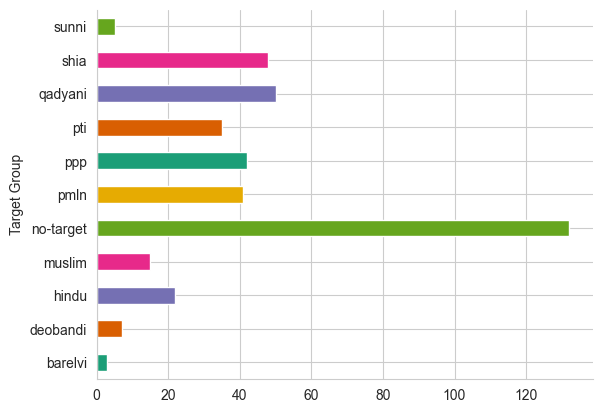

In [106]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Target Group').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# extracted_group = []
# dataset=  ["harami hain barelvi", "nawaz shareef choor hai", "Gustakh Zamin kutte ko giraftar karo" , "tumhara bhagwan bhi maderchod hai", 'Mirzai murtad jeene ka haq nahi rakhte', "Mutah ki is pedawar pe laanat","qadyani harami kafir hain"]
# #dataset = list_sent
# # target_group = ["Hindu", "muslim","Brelvi","Shia","sunni","deobnadi"]

# target_group = {"shia": "shia", "zuljana": "shia", "khatmal": "shia", "mutah": "shia", "shiaon": "shia", "zamin": "shia", "shia": "shia", "shia": "shia",
#                 "qadyani": "qadyani", "qadiyanyon": "qadyani", "sunni": "sunni", "Deobandi": "Deobandi", "barelvi": "barelvi", "Hindu": "Hindu", "bhagwan": "Hindu",
#                 "Brelviyon": "barelvi", "Ahmedi": "qadyani", "TablighiJamaat": "Deobandi", "Mirzai": "qadyani", "Zamin": "shia", "Muslim": "Muslim",
#                 "musalman": "Muslim","nawaz shareef": "PMLN"}
# target_group =  dict([(target_key.lower(), target_value.lower()) for (target_key, target_value) in target_group.items()])

# offensive_words = ["bharvy","Jahil","harami","chutiye", "tatti","kafir", 'ghaddar','maderchod','laanat','gustakh', 'murtad']
# for sent in dataset:
#   sent_token = word_tokenize(sent)
#   sent_token_ordered = [word.lower() for word in sent_token]
#   sent_token_unordered = set(sent_token_ordered)

#   resultant_group = []
#   # search whether the target group exist in the sentence
#   # already in lower case as above
#   # target_group = set([word.lower() for word in target_group.keys])
#   offensive_words = set([word.lower() for word in offensive_words])

#   result_target = list(sent_token_unordered.intersection(list(target_group.keys())))
#   if len(result_target) == 0:
#     result_target.append("no-target")
#  # print(result_target)

#   result_offensive = list(sent_token_unordered.intersection(offensive_words))
#   if len(result_offensive) == 0:
#     result_offensive.append("no-offensive")
#   #print(result_offensive)


#   resultant_group.append(" ".join(list(sent_token_ordered)))
#   resultant_group.append(target_group[result_target[0]] if result_target[0] != "no-target" else result_target[0])
#   resultant_group.append(", ".join(result_offensive))
#   # print(resultant_group)
#   # print(pd.DataFrame(resultant_group))
#   extracted_group.append(resultant_group)

#print(extracted_group)


In [ ]:
# List of offensive words
#offensive_words = ["bharwa", "Jahil", "harami", "chutiye", "tatti", "kafir", 'ghaddar', 'maderchod', 'laanat', 'gustakh', 'murtad', "bhosri wale"]

# Result container
# extracted_group = []

# for sent in dataset:
#     # Correctly access the sentence text and its category
#     sent_text = sent[0].lower()
#     sent_category = sent[1]  # Access the category
#     sent_tokens = sent_text.split()  # Using simple split for tokenization
#     sent_str = " ".join(sent_tokens)  # Rejoin for substring matching

#     # Initialize dictionary for each sentence
#     resultant_group = {"Sentence": sent[0], "Categories": sent_category}

#     # Search for target groups
#     found_target = False
#     for key, value in target_group.items():
#         if key in sent_str:  # Check if the key phrase is in the sentence string
#             resultant_group["Target Group"] = value
#             found_target = True
#             break  # Stop after the first match

#     if not found_target:
#         resultant_group["Target Group"] = "no-target"

#     # Search for offensive words
#     offensive_found = []
#     for word in offensive_words:
#         if word in sent_str:  # Check if the offensive phrase is in the sentence string
#             offensive_found.append(word)

#     resultant_group["Offensive Words"] = ", ".join(offensive_found) if offensive_found else "no-offensive"

#     extracted_group.append(resultant_group)